This notebook is based on the python B+-tree implementation, that you have to modify as part of Project 4. The implementation in turn tries to mimic the pseudocode described in the book, as faithfully as possible.

### Setup
The code is split across two files: disk_relations.py, and btree.py. The first file contains some basic primitives like Blocks, Relations, Tuples etc., whereas the second one has the B+-Tree implementation (with the caveat that one function does not work).

In [1]:
import math
import sys
sys.path.append("pyfiles")
from disk_relations import *
from btree import *
from create_sample_databases import *
from IPython.core.display import SVG

create_sample_databases has a function to create a database with two relations

In [2]:
# Create a sample database
db1 = createDatabase1("univ")

In [ ]:
db1.getRelation("instructor").printTuples()

### B+Trees
`create_sample_databases` also creates several B+-Trees. We can print out
the indexes as follows.

In [ ]:
db1.getIndex("instructor", "name").printTree()
idx = db1.getIndex("instructor", "name")

Currently the B+-Tree is printed out level-by-level as shown here. {Block 36} is a pointer to the Block 36, whereas {Block 26, Tuple 0} is a pointer to a specific tuple. 

You can use the DisplayBTree class to draw a proper tree -- this function basically generates an HTML SVG for the B-Tree.

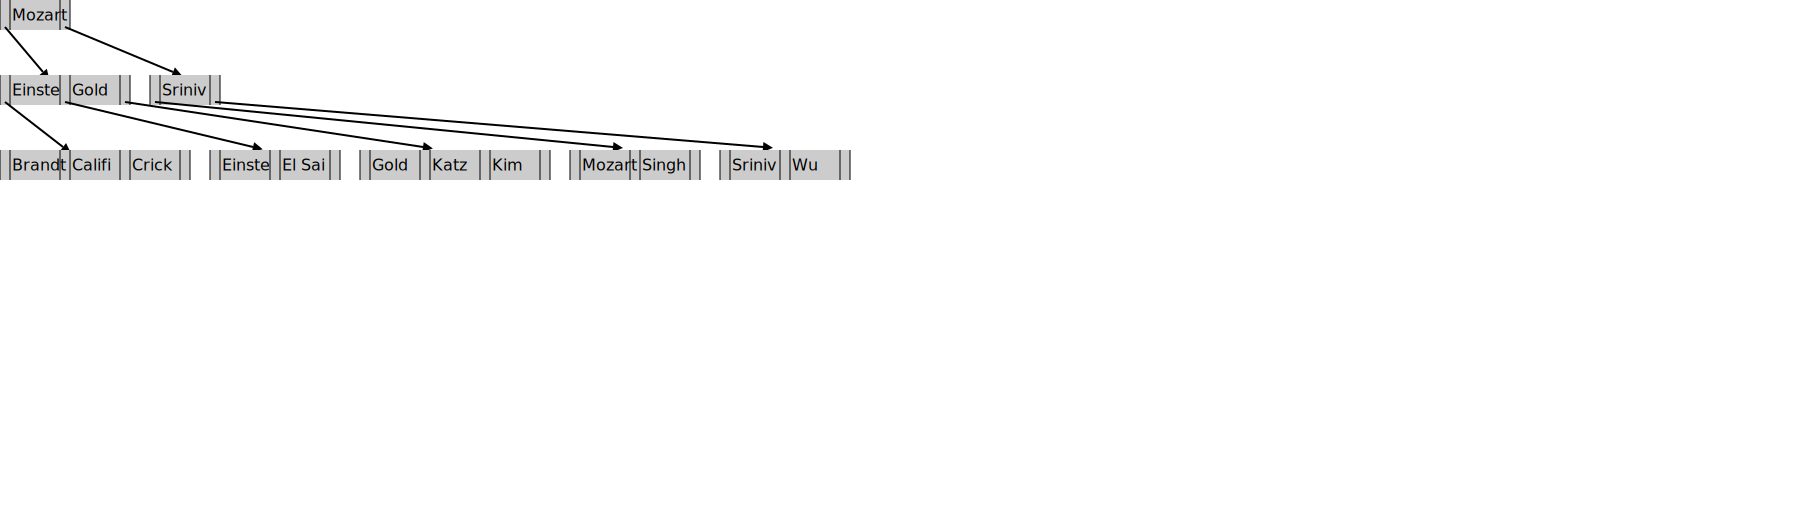

In [3]:
x = DisplayBTree(db1.getIndex("instructor", "name"))
SVG(x.html())

Inserting a tuple into the underlying relation will change the B+-Tree. You are encouraged to try this out. Note that: as discussed below, deletes don't fully work.

Let's see what happens when we try to insert 'Gray'.

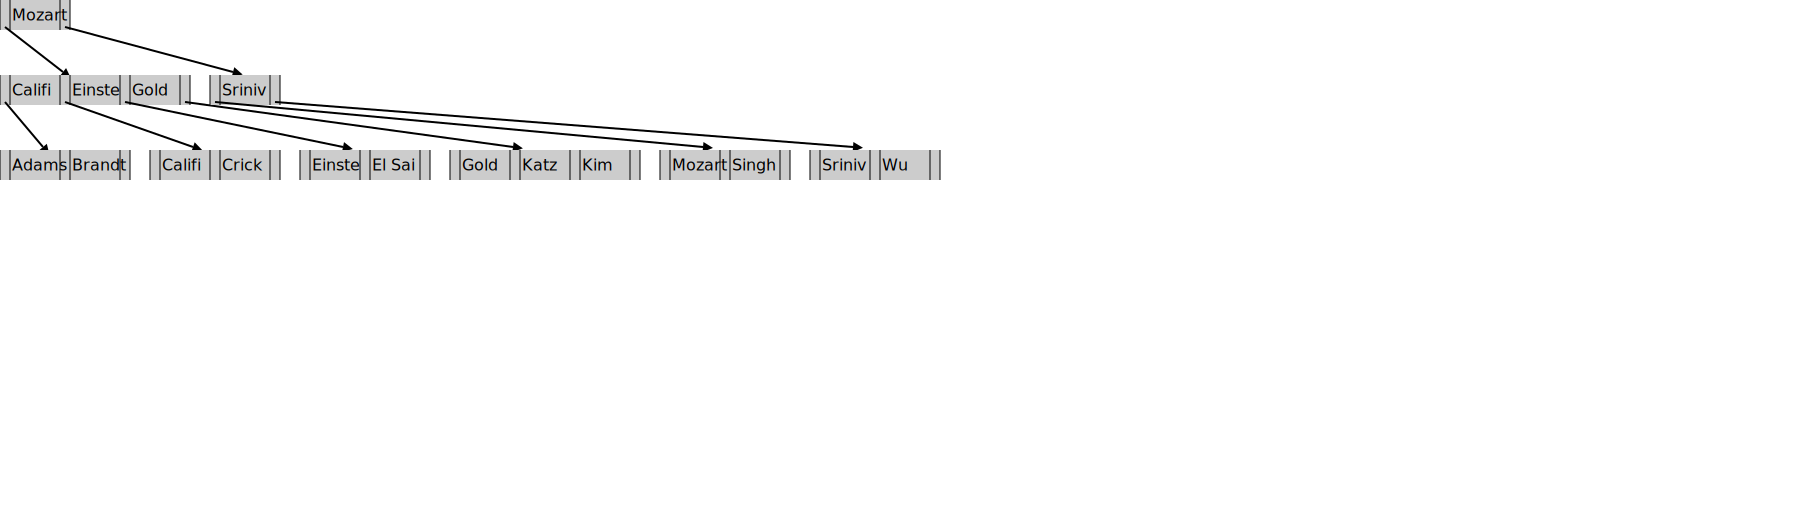

In [4]:
rel = db1.getRelation("instructor")
rel.insertTuple(Tuple(rel.schema, ('12346', 'Jones', 'Physics', '95000')))
SVG(DisplayBTree(db1.getIndex("instructor", "name")).html())

Now, if we try to insert say 'Davis', we would need to do a split at the second level.

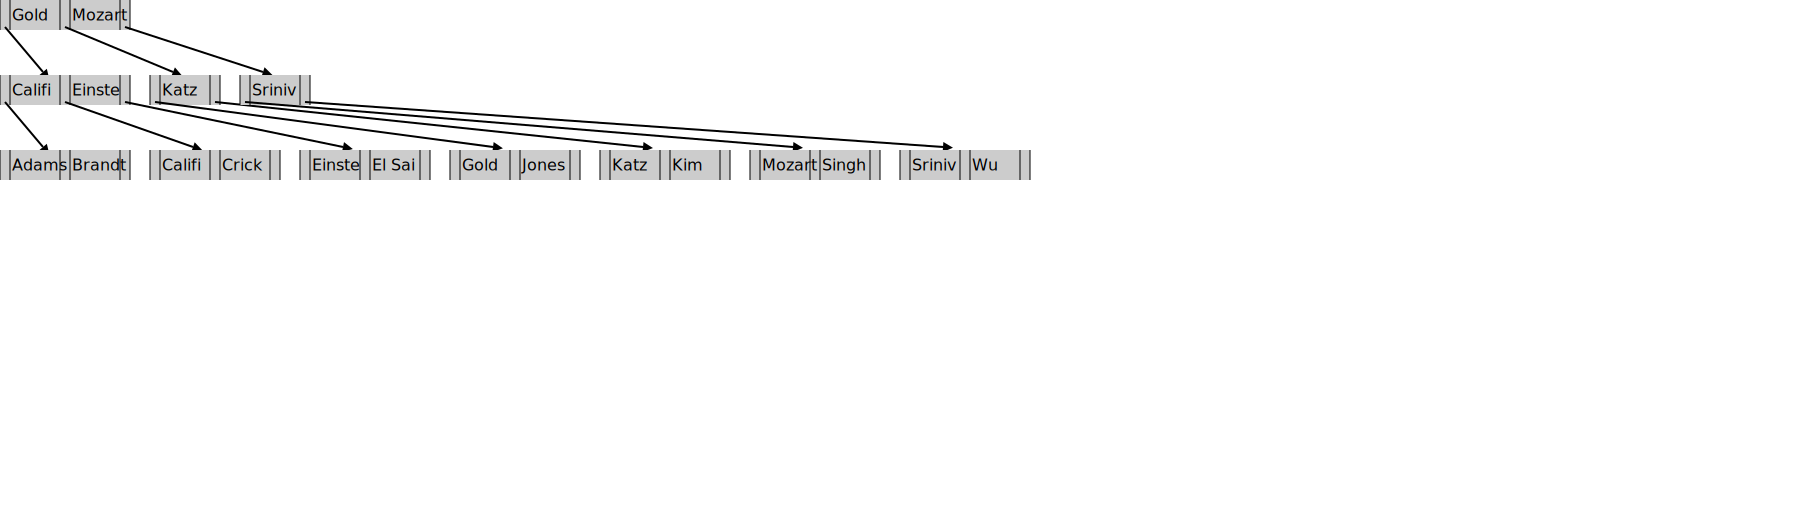

In [5]:
rel = db1.getRelation("instructor")
rel.insertTuple(Tuple(rel.schema, ('12346', 'Jones', 'Physics', '95000')))
SVG(DisplayBTree(db1.getIndex("instructor", "name")).html())

### Searching
The following snippet of code does a search using the tree, and prints out the resulting tuples. It also prints out the blocks that were retrieved during the search.

In [ ]:
Globals.printBlockAccesses = True
results = db1.getIndex("instructor", "name").searchByRange("M", "S")
if results is not None and len(results) != 0:
    print "Results: " + " ".join([str(ptr.getTuple()) for ptr in results])
else:
    print "No results found"
Globals.printBlockAccesses = False

### Deleting 
The following code finds a tuple and then deletes it from the relation (and effectively the two B+-Trees on the relation). We print out the final trees.

In [ ]:
deleteKey = "Srinivasan"
print "Deleting the entry for key " + deleteKey
index = db1.getIndex("instructor", "name")
results = index.searchByKey(deleteKey)
db1.getRelation("instructor").deleteTuple(results[0])
# The BTrees should have been adjusted automatically
#index.printTree()
#db1.getIndex("instructor", "dept_name").printTree()

In [ ]:
DisplayBTree(db1.getIndex("instructor", "name"))

In [ ]:
deleteKey = "Einstein"
print "Deleting the entry for key " + deleteKey
index = db1.getIndex("instructor", "name")
results = index.searchByKey(deleteKey)
db1.getRelation("instructor").deleteTuple(results[0])
DisplayBTree(db1.getIndex("instructor", "name"))

**Task 1**: However, if I try to delete "Brandt", there is an error because the functionality to redistribute is missing (and you have to implement this functionality).

In [ ]:
deleteKey = "Brandt"
index = db1.getIndex("instructor", "name")
results = index.searchByKey(deleteKey)
db1.getRelation("instructor").deleteTuple(results[0])
DisplayBTree(db1.getIndex("instructor", "name"))

**Important Note**: The tree and the database is in an inconsistent state now, and any more updates will break (until you implement the missing functionality and rerun). If you want to get back to a consistent state, go to "Kernel" menu option, and click "Restart and Clear Output". Then you can run the cells one-by-one again.

In [ ]:
DisplayBTree(db1.getIndex("instructor", "name"))